In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'sans-serif']

In [4]:
df = pd.read_csv('bike.csv', index_col='datetime', parse_dates=True)
df.head()

# datetime #时间和日期
# season  #季节, 1 =春季，2 =夏季，3 =秋季，4 =冬季
# holiday  #是否是假期, 1=是, 0=否
# workingday #是否是工作日, 1=是, 0=否
# weather #天气,1:晴朗，很少有云，部分多云，部分多云; 2:雾+多云，雾+碎云，雾+少云，雾; 3:小雪，小雨+雷雨+散云，小雨+散云; 4:大雨+冰块+雷暴+雾，雪+雾
# temp #温度
# atemp #体感温度
# humidity #相对湿度
# windspeed #风速
# casual #未注册用户租赁数量
# registered #注册用户租赁数量
# count #所有用户租赁总数


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
print('未去重: ', df.shape)
print('去重: ', df.index.drop_duplicates().shape)
print('未去NA: ', df.shape)
print('去NA: ', df.dropna(how='any').shape)

未去重:  (10886, 11)
去重:  (10886,)
未去NA:  (10886, 11)
去NA:  (10886, 11)


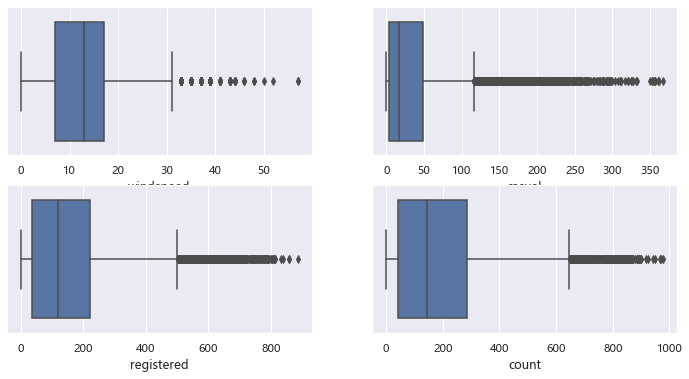

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
#绘制箱线图
sns.boxplot(x="windspeed", data=df,ax=axes[0][0])
sns.boxplot(x='casual', data=df, ax=axes[0][1])
sns.boxplot(x='registered', data=df, ax=axes[1][0])
sns.boxplot(x='count', data=df, ax=axes[1][1])
plt.show()

In [8]:
#转换格式, 并提取出小时, 星期几, 月份
df['hour'] = df.index.hour
df['week'] = df.index.dayofweek
df['month'] = df.index.month
df['year_month'] = df.index.strftime('%Y-%m')
df['date'] = df.index.date
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,month,year_month,date
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,2011-01,2011-01-01
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,2011-01,2011-01-01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,2011-01,2011-01-01
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,2011-01,2011-01-01
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,2011-01,2011-01-01


f:\venvs\data-analysis\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


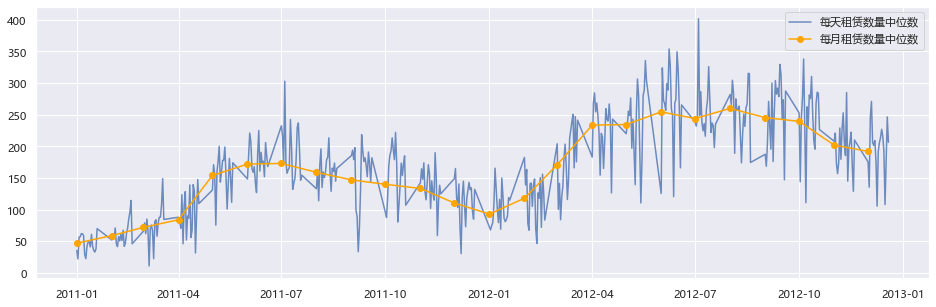

In [9]:
# 数据形态分析
group_date = df.groupby('date')['count'].median()
group_month = df.groupby('year_month')['count'].median()

group_month.index = pd.to_datetime(group_month.index)


plt.figure(figsize=(16,5))
plt.plot(group_date.index, group_date.values, '-', color = 'b', label = '每天租赁数量中位数', alpha=0.8)
plt.plot(group_month.index, group_month.values, '-o', color='orange', label = '每月租赁数量中位数')
plt.legend()
plt.show()

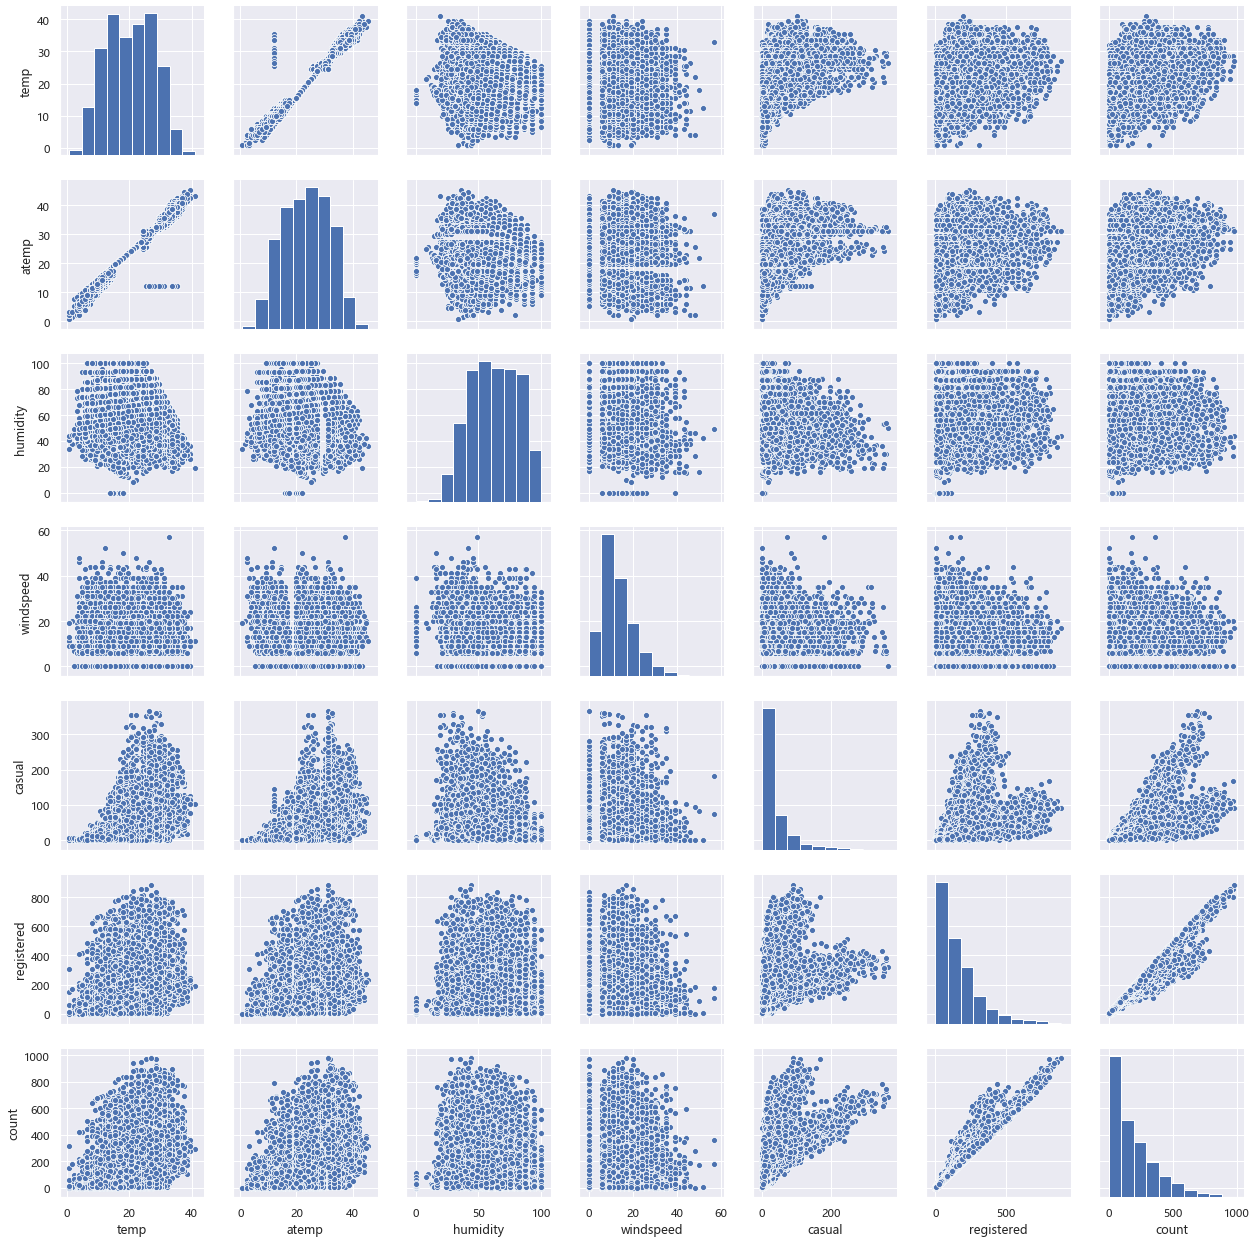

In [10]:
# 关联关系分析
sns.pairplot(df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])

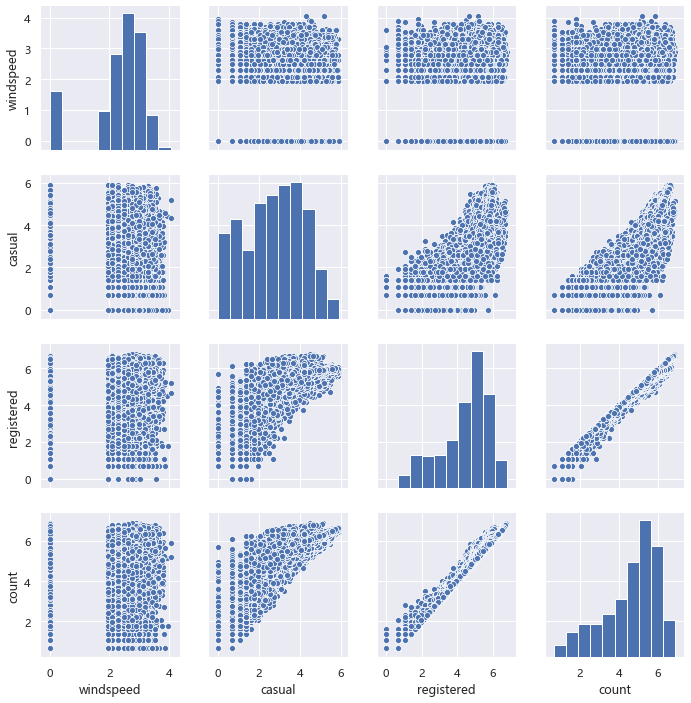

In [11]:
# 由于多个变量不满足正态分布, 对其进行对数变换.

df['windspeed'] = np.log(df['windspeed'] + 1)
df['casual'] = np.log(df['casual'] + 1)
df['registered'] = np.log(df['registered'] + 1)
df['count'] = np.log(df['count'] + 1)
sns.pairplot(df[['windspeed', 'casual', 'registered', 'count']])

[]

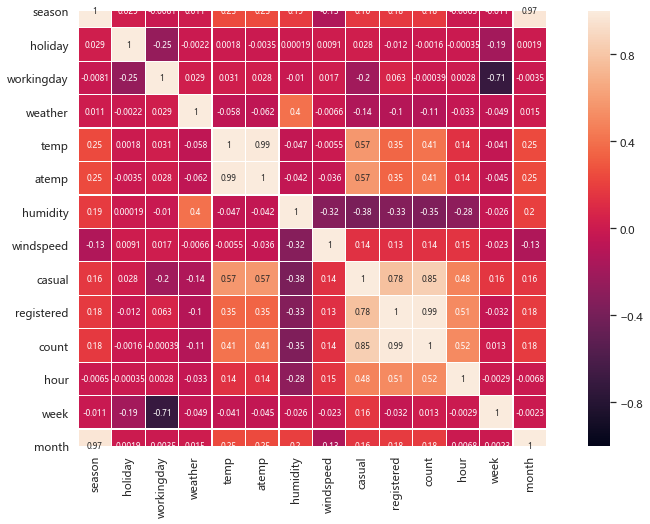

In [12]:
# 经过对数变换之后, 注册用户和所有用户的租赁数量和正态还是相差较大, 故在计算相关系数时选择spearman相关系数.


correlation = df.corr(method='spearman')
plt.figure()
#绘制热力图
sns.heatmap(
    correlation, linewidths=0.2, vmax=1, vmin=-1, linecolor='w',
    annot=True,annot_kws={'size':8},square=True
)
plt.plot()

## 预测模型训练

In [16]:
from sklearn.model_selection import train_test_split

#由于所有用户的租赁数量是由未注册用户和注册用户相加而成, 故删除.
X = df.drop(['count', 'casual','registered', 'year_month', 'date'], axis=1)
y = df['count']

#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 岭回归

In [17]:
from sklearn.linear_model import Ridge

rd = Ridge(alpha=805.0291812295973)
rd.fit(X_train, y_train)
print('系数', rd.coef_)
print('截距', rd.intercept_)

系数 [-0.02222834  0.00195007 -0.00383269  0.0051805   0.00998483  0.03478422
 -0.01591338  0.03315622  0.09700422  0.02626527  0.06736472]
截距 2.883437944686218


In [18]:
from sklearn import metrics
from math import sqrt

#分别预测训练数据和测试数据
y_train_pred = rd.predict(X_train)
y_test_pred = rd.predict(X_test)
#分别计算其均方根误差和拟合优度
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_pred))
y_train_score = rd.score(X_train, y_train)
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_pred))
y_test_score = rd.score(X_test, y_test)
print('训练集RMSE: {0}, 评分: {1}'.format(y_train_rmse, y_train_score))
print('测试集RMSE: {0}, 评分: {1}'.format(y_test_rmse, y_test_score))

训练集RMSE: 1.0347532403339654, 评分: 0.46696878317609447
测试集RMSE: 1.0503948623110926, 评分: 0.4584384044791613


### Lasso回归

In [19]:
from sklearn.linear_model import Lasso

las = Lasso(alpha=0.005074705239490466)
las.fit(X_train, y_train)
print('系数', las.coef_)
print('截距', las.intercept_)

系数 [-0.          0.         -0.          0.          0.00927876  0.03532292
 -0.0158322   0.03151281  0.09719376  0.02620071  0.06041003]
截距 2.8762560347037542


In [20]:
#用Lasso分别预测训练集和测试集, 并计算均方根误差和拟合优度
y_train_pred = las.predict(X_train)
y_test_pred = las.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_pred))
y_train_score = las.score(X_train, y_train)
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_pred))
y_test_score = las.score(X_test, y_test)
print('训练集RMSE: {0}, 评分: {1}'.format(y_train_rmse, y_train_score))
print('测试集RMSE: {0}, 评分: {1}'.format(y_test_rmse, y_test_score))

训练集RMSE: 1.0348707508266524, 评分: 0.4668477102186035
测试集RMSE: 1.0502928101656333, 评分: 0.4585436312656185


### 简单线性回归

In [21]:
from sklearn.linear_model import LinearRegression
#训练线性回归模型
lr = LinearRegression()
lr.fit(X_train, y_train)
print('系数', lr.coef_)
print('截距', lr.intercept_)

系数 [-0.08088474  0.0262702   0.00055723  0.00629701  0.00822705  0.03643963
 -0.01593488  0.03689993  0.09710786  0.02781275  0.08643481]
截距 2.8839588300453642


In [22]:
#分别预测训练集和测试集, 并计算均方根误差和拟合优度
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_pred))
y_train_score = lr.score(X_train, y_train)
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_pred))
y_test_score = lr.score(X_test, y_test)
print('训练集RMSE: {0}, 评分: {1}'.format(y_train_rmse, y_train_score))
print('测试集RMSE: {0}, 评分: {1}'.format(y_test_rmse, y_test_score))

训练集RMSE: 1.0346263636032687, 评分: 0.46709949088362923
测试集RMSE: 1.0507846838842776, 评分: 0.458036362209845
